#0. Import Libraries

In [ ]:
!pip install google-play-scraper
!from google_play_scraper import app
from google_play_scraper import Sort, reviews

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=4f5a8e85e0a0b4815c45c7d3f755d8fb6b1c9de09c1d16572bac015383469114
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper
from: can't read /var/mail/google_play_scraper
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

#Data Pre-processing
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import re

#Pytorch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torch
import torch.nn as nn
import itertools

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#1. Data Scraping

In [ ]:
reviews1 = reviews(
    'com.telkom.tracencare',
    count = 1000,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    continuation_token=None
)

In [ ]:
list1 = list(reviews1)
list1.pop(1)
[list1] = list1

In [ ]:
df = pd.DataFrame(np.array(list1),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df

#2. Data Preprocessing

In [ ]:
#Check if there are any null values
data_v1 = df[['content']]
data_v1.isnull().sum()

In [ ]:
def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  return " ".join(filtered_words)
data_v1['content']=data_v1['content'].map(lambda s:preprocess(s)) 

In [ ]:
data_v1.replace(r'^\s*$', np.nan, regex=True, inplace = True)
data_v1 = data_v1.dropna()

In [ ]:
data_v1.to_excel('data.xlsx')

#2.1. Data Pre-processing (Setelah labelisasi)

In [ ]:
data_v2 = pd.read_csv('data15.csv')

In [ ]:
data_v2 = data_v2.dropna()

In [ ]:
data_v2.pop('Rizaldi')
data_v2.pop('Joule')
data_v2.pop('Bana')

0       0
1       1
2       0
3       1
4       0
       ..
1495    0
1496    0
1497    1
1498    0
1499    1
Name: Bana, Length: 1500, dtype: int64

In [ ]:
data_v2.groupby('Sentimen').count()

,content
Sentimen,
0,584
1,916


In [ ]:
data_v2

,content,Sentimen
0,sulit masukkan tgl lahir simpan sering gagal,0
1,mudahan bisa cepet selsai pandemi nya,1
2,kenapa saya tidak ada nama vaksin coronovac ja...,0
3,sangat membantu dan memuaskan,1
4,terlalu rumit buat pengurusan tiket boster nya...,0
...,...,...
1495,heran sama ini aplikasi saya sudah vaksin sama...,0
1496,sangat bikin emosi buat apa aplk kalau tidak bisa,0
1497,pateeeen,1
1498,bintang dulu sebab tidak muncul sertifikat vak...,0


In [ ]:
from sklearn.utils import shuffle
data_v2 = shuffle(data_v2, random_state = 1)

In [ ]:
data_v2

,content,Sentimen
91,saya tdk bisa log padahal saya gunakan sama de...,0
75,aplikasi anjeng mau klaim sertifikat aja susah...,0
1264,bagus sekali sangat membanty,1
330,godd,1
1349,unumvv,1
...,...,...
715,aplikasi ini sangat berguna bagi semua orang t...,1
905,sudah punya aplikasi tapi ilang,1
1096,terimksih moga updet melulu,1
235,ribet,0


In [ ]:
reviews_split = data_v2['content'].to_numpy()

In [ ]:
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [ ]:
print (count_words)

Counter({'vaksin': 332, 'aplikasi': 253, 'saya': 236, 'sertifikat': 233, 'sangat': 224, 'bagus': 195, 'bisa': 170, 'sudah': 157, 'ini': 155, 'dan': 149, 'tidak': 135, 'membantu': 132, 'nya': 124, 'ada': 104, 'muncul': 99, 'tapi': 85, 'untuk': 85, 'mantap': 83, 'gak': 81, 'mau': 75, 'susah': 71, 'belum': 66, 'udah': 65, 'baik': 64, 'yang': 62, 'good': 61, 'aja': 60, 'padahal': 57, 'harus': 54, 'update': 50, 'ribet': 49, 'booster': 48, 'dari': 46, 'kok': 45, 'data': 45, 'klaim': 44, 'tanggal': 44, 'kenapa': 43, 'tolong': 42, 'buat': 41, 'banget': 41, 'peduli': 40, 'lagi': 40, 'lahir': 39, 'malah': 39, 'masuk': 39, 'sekali': 38, 'apk': 38, 'aplikasinya': 38, 'keluar': 38, 'lemot': 37, 'semua': 37, 'terus': 36, 'lindungi': 36, 'bikin': 35, 'jadi': 33, 'juga': 32, 'masih': 31, 'lama': 30, 'saat': 28, 'bermanfaat': 28, 'eror': 28, 'tdk': 27, 'sama': 27, 'mohon': 27, 'tgl': 27, 'download': 26, 'sdh': 26, 'lebih': 25, 'kasih': 25, 'gimana': 25, 'sampai': 25, 'berguna': 25, 'sekarang': 24, 'sel

In [ ]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [ ]:
print (vocab_to_int)

{'vaksin': 1, 'aplikasi': 2, 'saya': 3, 'sertifikat': 4, 'sangat': 5, 'bagus': 6, 'bisa': 7, 'sudah': 8, 'ini': 9, 'dan': 10, 'tidak': 11, 'membantu': 12, 'nya': 13, 'ada': 14, 'muncul': 15, 'tapi': 16, 'untuk': 17, 'mantap': 18, 'gak': 19, 'mau': 20, 'susah': 21, 'belum': 22, 'udah': 23, 'baik': 24, 'yang': 25, 'good': 26, 'aja': 27, 'padahal': 28, 'harus': 29, 'update': 30, 'ribet': 31, 'booster': 32, 'dari': 33, 'kok': 34, 'data': 35, 'klaim': 36, 'tanggal': 37, 'kenapa': 38, 'tolong': 39, 'buat': 40, 'banget': 41, 'peduli': 42, 'lagi': 43, 'lahir': 44, 'malah': 45, 'masuk': 46, 'sekali': 47, 'apk': 48, 'aplikasinya': 49, 'keluar': 50, 'lemot': 51, 'semua': 52, 'terus': 53, 'lindungi': 54, 'bikin': 55, 'jadi': 56, 'juga': 57, 'masih': 58, 'lama': 59, 'saat': 60, 'bermanfaat': 61, 'eror': 62, 'tdk': 63, 'sama': 64, 'mohon': 65, 'tgl': 66, 'download': 67, 'sdh': 68, 'lebih': 69, 'kasih': 70, 'gimana': 71, 'sampai': 72, 'berguna': 73, 'sekarang': 74, 'selalu': 75, 'orang': 76, 'dengan'

In [ ]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[3, 63, 7, 453, 28, 3, 271, 64, 77, 25, 3, 874, 65, 875], [2, 454, 20, 36, 4, 27, 21, 80, 37, 44, 19, 7, 146, 30, 167, 31, 23, 584, 197, 45, 30, 2, 53, 4, 19, 7, 585, 40, 2, 585, 876, 877, 455, 454, 878, 586], [6, 47, 5, 879]]


In [ ]:
encoded_labels = data_v2['Sentimen'].to_numpy()

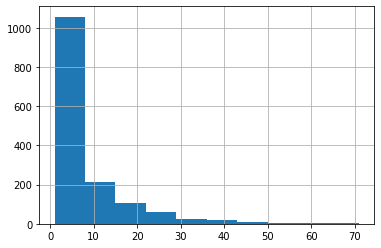

count    1500.000000
mean        7.235333
std         9.734019
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max        71.000000
dtype: float64

In [ ]:
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [ ]:
def pad_features(reviews_int, seq_length):
  ''' Return features of review_ints, where each review is padded with 0's or 
  truncated to the input seq_length. '''
  features = np.zeros((len(reviews_int), seq_length), dtype = int)
  for i, review in enumerate(reviews_int):
    review_len = len(review)  
    if review_len <= seq_length:
      zeroes = list(np.zeros(seq_length-review_len))
      new = zeroes+review
    elif review_len > seq_length:
      new = review[0:seq_length]
    features[i,:] = np.array(new)
  return features

In [ ]:
features = pad_features(reviews_int,100)

In [ ]:
print(features[:5,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  63   7 453
   28   3 271  64  77  25   3 874  65 875]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   2 454  20  36   4  27  21  80
   37  44  19   7 146  30 167  31  23 584 197  45  30   2  53   4  19   7
  585  40   2 585 876 877 455 454 878 586]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 

In [ ]:
len_feat = len(features)

In [ ]:
split_frac = 2/3
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [ ]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [ ]:
# obtain one batch of training data
dataiter = iter(valid_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 100])
Sample input: 
 tensor([[   0,    0,    0,  ...,   19,   20,   15],
        [   0,    0,    0,  ...,   27,   19,    7],
        [   0,    0,    0,  ...,    7,   74, 1880],
        ...,
        [   0,    0,    0,  ...,    0,    0,  181],
        [   0,    0,    0,  ...,    0,    0,   18],
        [   0,    0,    0,  ...,  353,    3,    1]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 1])


#3. Model Building

In [ ]:
class SentimentLSTM(nn.Module):
  #The RNN model that will be used to perform Sentiment analysis.
  def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, 
               n_layers, drop_prob=0.5):
    """
    Initialize the model by setting up the layers.
    """
    super().__init__()
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    # embedding and LSTM layers
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    if (n_layers > 1):
      self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                          dropout=drop_prob, batch_first=True)
    else:
      self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True)
    # dropout layer
    self.dropout = nn.Dropout(0.3)
    # linear and sigmoid layers
    self.fc = nn.Linear(hidden_dim, output_size)
    self.sig = nn.Sigmoid()
        
  def forward(self, x, hidden):
    #Perform a forward pass of our model on some input and hidden state.
    batch_size = x.size(0)
    # embeddings and lstm_out
    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)
    # stack up lstm outputs
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
    # dropout and fully-connected layer
    out = self.dropout(lstm_out)
    out = self.fc(out)
    # sigmoid function
    sig_out = self.sig(out)
    # reshape to be batch_size first
    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:, -1] # get last batch of labels
    # return last sigmoid output and hidden state
    return sig_out, hidden
    
  def init_hidden(self, batch_size):
    #Initializes hidden state
    # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
    # initialized to zero, for hidden state and cell state of LSTM
    weight = next(self.parameters()).data
    hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(), 
              weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
    return hidden

In [ ]:
#Hyperparameters
lr=0.01
embedding_dims = [200,400]
hidden_dims = [128,256]
n_layers = [1,2]
optimizers = ["Adam", "SGD"]

In [ ]:
def create_model(embedding_dim, hidden_dim, n_layer, optimizer):
  vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
  output_size = 1
  net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layer)
  if optimizer == "Adam":
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  else:
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
  return net, optimizer

In [ ]:
models = []
for embedding_dim in embedding_dims:
  for hidden_dim in hidden_dims:
    for n_layer in n_layers:
      for optimizer in optimizers:
        net, optim = create_model(embedding_dim, hidden_dim, n_layer, optimizer)
        models.append([net, optim])

In [ ]:
nomor = 1
for a in models:
  print("Model ke-{}".format(nomor))
  nomor += 1
  print(a, "\n")

Model ke-1
[SentimentLSTM(
  (embedding): Embedding(2265, 200)
  (lstm): LSTM(200, 128, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
), Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)] 

Model ke-2
[SentimentLSTM(
  (embedding): Embedding(2265, 200)
  (lstm): LSTM(200, 128, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
), SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)] 

Model ke-3
[SentimentLSTM(
  (embedding): Embedding(2265, 200)
  (lstm): LSTM(200, 128, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
), Adam (


In [ ]:
setop

#4. Training and Testing

In [ ]:
criterion = nn.BCELoss()
epochs = 10
clip=5
model_losses = []
model_val_losses = []
model_lowest_avg_losses = []
counter = 1
for net, optimizer in models:
  losses = []
  val_losses = []
  lowest_avg_losses = 1
  net.train()
  print("model ke-{}".format(counter))
  for e in range(epochs):
    h = net.init_hidden(batch_size)
    for inputs, labels in train_loader:
      h = tuple([each.data for each in h])
      net.zero_grad()
      inputs = inputs.type(torch.LongTensor)
      output, h = net(inputs, h)
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
    losses.append(loss.item())
    val_h = net.init_hidden(batch_size)
    net.eval()
    for inputs, labels in valid_loader:
      val_h = tuple([each.data for each in val_h])
      inputs = inputs.type(torch.LongTensor)
      output, val_h = net(inputs, val_h)
      val_loss = criterion(output.squeeze(), labels.float())
    val_losses.append(val_loss.item())
    avg_losses = (loss.item()+val_loss.item())/2
    if (avg_losses < lowest_avg_losses):
      lowest_avg_losses = avg_losses
      torch.save(net.state_dict(), '/content/model{}.pt'.format(counter))
    print("Epoch: {}/{}...".format(e+1, epochs), "Loss: {:.6f}...".format(loss.item()), "Val Loss: {:.6f}".format(val_loss.item()))
    net.train()
  print("Rata-rata loss terkecil:{}".format(lowest_avg_losses))
  model_losses.append(losses)
  model_val_losses.append(val_losses)
  model_lowest_avg_losses.append(lowest_avg_losses)
  counter += 1

In [ ]:
epochs = 10
plt_epochs = range(1,epochs+1)
plt.plot(plt_epochs, model_losses[0], 'g', label='Training loss')
plt.plot(plt_epochs, model_val_losses[0], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xticks(range(1, 11))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
counter = 1
for net, optimizer in models:
  net.load_state_dict(torch.load('/content/model{}.pt'.format(counter)))
  break
  counter += 1

In [ ]:
np_models = np.array(models)

In [ ]:
np_models[0]

array([SentimentLSTM(
         (embedding): Embedding(2265, 200)
         (lstm): LSTM(200, 128, batch_first=True)
         (dropout): Dropout(p=0.3, inplace=False)
         (fc): Linear(in_features=128, out_features=1, bias=True)
         (sig): Sigmoid()
       )                                                         ,
       Adam (
       Parameter Group 0
           amsgrad: False
           betas: (0.9, 0.999)
           eps: 1e-08
           lr: 0.01
           maximize: False
           weight_decay: 0
       )                      ], dtype=object)

In [ ]:
criterion = nn.BCELoss()
#best model
net = np_models[0][0]
test_losses = [] # track loss
all_labels = torch.tensor([])
all_preds = torch.tensor([])
h = net.init_hidden(batch_size)
net.eval()
# iterate over test data
for inputs, labels in test_loader:
  h = tuple([each.data for each in h])
  inputs = inputs.type(torch.LongTensor)
  output, h = net(inputs, h)
  test_loss = criterion(output.squeeze(), labels.float())
  test_losses.append(test_loss.item())
  pred = torch.round(output.squeeze())
  all_preds = torch.cat((all_preds, pred),dim=0)
  all_labels = torch.cat((all_labels, labels),dim=0)
  np_preds = all_preds.detach().numpy()
  np_labels = all_labels.detach().numpy()

In [ ]:
np_preds

array([1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1.

In [ ]:
np_labels

array([1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0.

#5. Hasil

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', 
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(np_labels, np_preds)
labels = np.array([0,1])

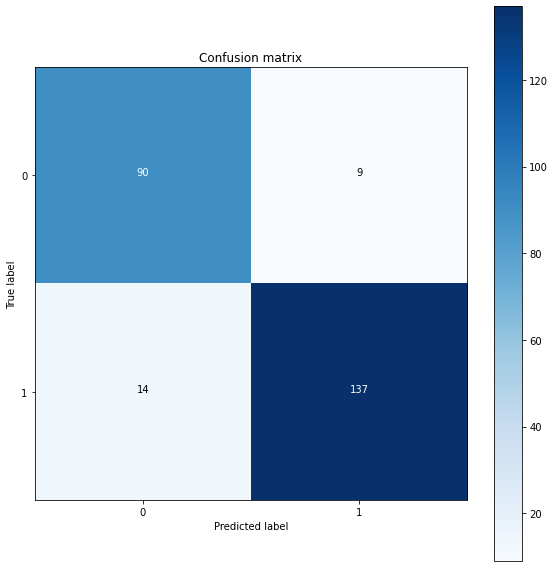

Test loss: 0.442
Accuracy: 0.908
Precision: 0.938
Recall: 0.907
F1 Score: 0.923



In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, labels)
plt.show()
acc = accuracy_score(np_labels, np_preds)
pre = precision_score(np_labels, np_preds)
rec = recall_score(np_labels, np_preds)
f1 = f1_score(np_labels, np_preds)
print("Test loss: {:.3f}".format(np.mean(test_losses)))
print("Accuracy: {:.3f}".format(acc))
print("Precision: {:.3f}".format(pre))
print("Recall: {:.3f}".format(rec))
print("F1 Score: {:.3f}\n".format(f1))

#6. RNN

In [ ]:
import torch.nn as nn
class RNN(nn.Module):
  def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
    super().__init__()
    self.embedding = nn.Embedding(input_dim, embedding_dim)
    self.rnn = nn.RNN(embedding_dim, hidden_dim)
    self.fc = nn.Linear(hidden_dim, output_dim)
    self.sig = nn.Sigmoid()
  def forward(self, text):
    embedded = self.embedding(text)
    output, hidden = self.rnn(embedded)
    assert torch.equal(output[-1,:,:], hidden.squeeze(0))
    out = self.fc(hidden.squeeze(0))
    sig_out = self.sig(out)
    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:, -1]
    return sig_out

In [ ]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
net = RNN(vocab_size, 200, 128, 1)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [ ]:
print(net)

RNN(
  (embedding): Embedding(2265, 200)
  (rnn): RNN(200, 128)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
criterion = nn.BCELoss()
epochs = 10
clip=5
losses = []
val_losses = []
lowest_avg_losses = 1
net.train()
for e in range(epochs):
  for inputs, labels in train_loader:
    net.zero_grad()
    inputs = inputs.type(torch.LongTensor)
    output = net(inputs)
    loss = criterion(output.squeeze(), labels.float())
    loss.backward()
    nn.utils.clip_grad_norm_(net.parameters(), clip)
    optimizer.step()
  losses.append(loss.item())
  net.eval()
  for inputs, labels in valid_loader:
    inputs = inputs.type(torch.LongTensor)
    output = net(inputs)
    val_loss = criterion(output.squeeze(), labels.float())
  val_losses.append(val_loss.item())
  avg_losses = (loss.item()+val_loss.item())/2
  if (avg_losses < lowest_avg_losses):
    lowest_avg_losses = avg_losses
    torch.save(net.state_dict(), '/content/model_rnn.pt')
  print("Epoch: {}/{}...".format(e+1, epochs), "Loss: {:.6f}...".format(loss.item()), "Val Loss: {:.6f}".format(val_loss.item()))
  net.train()
print("Rata-rata loss terkecil:{}".format(lowest_avg_losses))

Epoch: 1/10... Loss: 0.709157... Val Loss: 0.699500
Epoch: 2/10... Loss: 0.715621... Val Loss: 0.690266
Epoch: 3/10... Loss: 0.705261... Val Loss: 0.663637
Epoch: 4/10... Loss: 0.608199... Val Loss: 0.697030
Epoch: 5/10... Loss: 0.678294... Val Loss: 0.681246
Epoch: 6/10... Loss: 0.585047... Val Loss: 0.683601
Epoch: 7/10... Loss: 0.694962... Val Loss: 0.695864
Epoch: 8/10... Loss: 0.611460... Val Loss: 0.728990
Epoch: 9/10... Loss: 0.714079... Val Loss: 0.720241
Epoch: 10/10... Loss: 0.731147... Val Loss: 0.634205
Rata-rata loss terkecil:0.6343240737915039


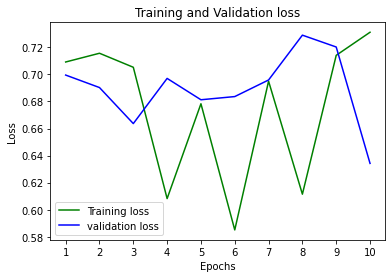

In [ ]:
plt_epochs = range(1,epochs+1)
plt.plot(plt_epochs, losses, 'g', label='Training loss')
plt.plot(plt_epochs, val_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xticks(range(1, 11))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
net.load_state_dict(torch.load('/content/model_rnn.pt'))

In [ ]:
criterion = nn.BCELoss()
test_losses = []
all_labels = torch.tensor([])
all_preds = torch.tensor([])
net.eval()
for inputs, labels in test_loader:
  inputs = inputs.type(torch.LongTensor)
  output = net(inputs)
  test_loss = criterion(output.squeeze(), labels.float())
  test_losses.append(test_loss.item())
  pred = torch.round(output.squeeze())
  all_preds = torch.cat((all_preds, pred),dim=0)
  all_labels = torch.cat((all_labels, labels),dim=0)
  np_preds = all_preds.detach().numpy()
  np_labels = all_labels.detach().numpy()

In [ ]:
cm = confusion_matrix(np_labels, np_preds)
labels = np.array([0,1])

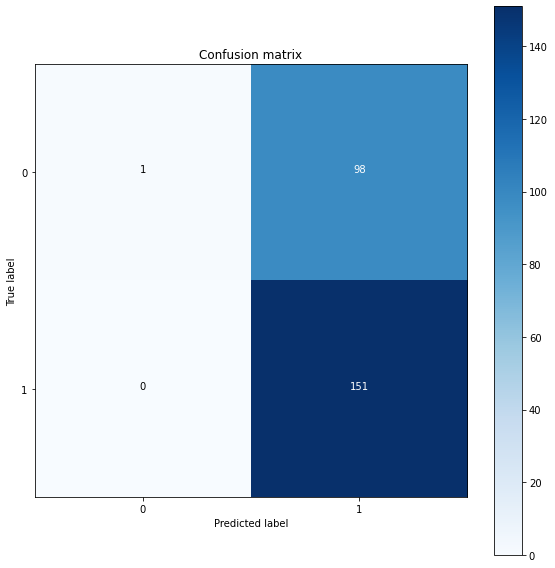

Test loss: 0.668
Accuracy: 0.608
Precision: 0.606
Recall: 1.000
F1 Score: 0.755



In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, labels)
plt.show()
acc = accuracy_score(np_labels, np_preds)
pre = precision_score(np_labels, np_preds)
rec = recall_score(np_labels, np_preds)
f1 = f1_score(np_labels, np_preds)
print("Test loss: {:.3f}".format(np.mean(test_losses)))
print("Accuracy: {:.3f}".format(acc))
print("Precision: {:.3f}".format(pre))
print("Recall: {:.3f}".format(rec))
print("F1 Score: {:.3f}\n".format(f1))